In [1]:
import pandas as pd
import numpy as np

In [2]:
my_data = pd.read_csv("my_data_FI.csv")
my_data.head()

,VV,VH,VV-VH,Entropy,Anisotropy,Alpha,GLCM PC1,GLCM PC2,GLCM PC3,GLCM PC4,GLCM PC5,GLCM PC6,DEM,PC1,PC2,PC3,PC4,PC5,PC6,ClassID
0,-19.127264,-26.148289,7.021025,0.802243,0.511247,24.109398,-11.121046,2.120520,-1.187986,0.305749,-0.217070,0.766538,46,1.045,0.114,0.089072,0.028547,0.028547,0.008142,1
1,-17.905613,-27.497355,9.591742,0.783197,0.534009,24.449989,-11.905989,-0.035668,0.034768,0.406617,-0.557473,-0.152389,54,1.049,0.117,0.090146,0.029851,0.029851,0.008729,1
2,-15.280186,-22.360802,7.080616,0.771204,0.547740,23.534164,-7.164552,-7.279618,0.445399,1.520445,-0.423039,-1.244990,54,1.027,0.126,0.087076,0.028418,0.028418,0.005288,1
3,-14.594241,-20.822491,6.228250,0.814251,0.496232,24.446283,-5.439240,0.077479,-1.435103,-0.307729,-0.324791,-0.860380,59,1.005,0.115,0.085156,0.031047,0.031047,0.008023,1
4,-14.800154,-19.735399,4.935246,0.846771,0.452534,28.770714,-4.033033,0.462254,2.218574,-0.027918,-0.247315,-0.528220,53,1.020,0.122,0.082730,0.032016,0.032016,0.004915,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [4]:
y=my_data.iloc[:,19]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ClassID, dtype: int64

In [5]:
x=my_data.iloc[:,0:19]
x.head()

,VV,VH,VV-VH,Entropy,Anisotropy,Alpha,GLCM PC1,GLCM PC2,GLCM PC3,GLCM PC4,GLCM PC5,GLCM PC6,DEM,PC1,PC2,PC3,PC4,PC5,PC6
0,-19.127264,-26.148289,7.021025,0.802243,0.511247,24.109398,-11.121046,2.120520,-1.187986,0.305749,-0.217070,0.766538,46,1.045,0.114,0.089072,0.028547,0.028547,0.008142
1,-17.905613,-27.497355,9.591742,0.783197,0.534009,24.449989,-11.905989,-0.035668,0.034768,0.406617,-0.557473,-0.152389,54,1.049,0.117,0.090146,0.029851,0.029851,0.008729
2,-15.280186,-22.360802,7.080616,0.771204,0.547740,23.534164,-7.164552,-7.279618,0.445399,1.520445,-0.423039,-1.244990,54,1.027,0.126,0.087076,0.028418,0.028418,0.005288
3,-14.594241,-20.822491,6.228250,0.814251,0.496232,24.446283,-5.439240,0.077479,-1.435103,-0.307729,-0.324791,-0.860380,59,1.005,0.115,0.085156,0.031047,0.031047,0.008023
4,-14.800154,-19.735399,4.935246,0.846771,0.452534,28.770714,-4.033033,0.462254,2.218574,-0.027918,-0.247315,-0.528220,53,1.020,0.122,0.082730,0.032016,0.032016,0.004915


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
print(x.shape);print(model)

(7547, 19)
DecisionTreeRegressor()


In [8]:
importance = model.feature_importances_

In [18]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01903
Feature: 1, Score: 0.01844
Feature: 2, Score: 0.01368
Feature: 3, Score: 0.02828
Feature: 4, Score: 0.03160
Feature: 5, Score: 0.01839
Feature: 6, Score: 0.10495
Feature: 7, Score: 0.01271
Feature: 8, Score: 0.01901
Feature: 9, Score: 0.01660
Feature: 10, Score: 0.03742
Feature: 11, Score: 0.01794
Feature: 12, Score: 0.24921
Feature: 13, Score: 0.06871
Feature: 14, Score: 0.13385
Feature: 15, Score: 0.05675
Feature: 16, Score: 0.02818
Feature: 17, Score: 0.07286
Feature: 18, Score: 0.05240


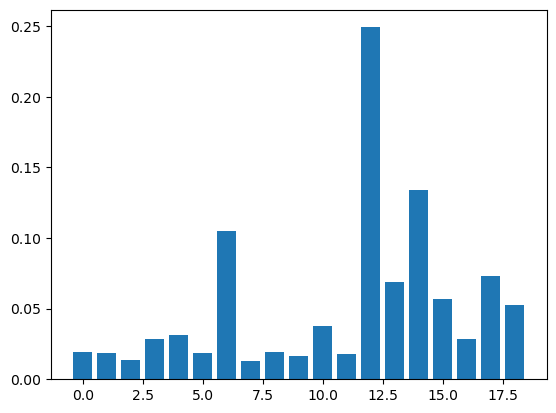

In [19]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [12]:
df=pd.DataFrame(importance,columns=['feature_weights'])
display(df)

,feature_weights
0,0.019032
1,0.018436
2,0.013682
3,0.028284
4,0.031598
5,0.018387
6,0.104954
7,0.012712
8,0.019006
9,0.016595
